In [1]:
import csv
import numpy as np
from typing import Set,Tuple, List
import torch
import torch.utils
import torch.utils.data
import torch.nn as nn
import torchvision
NoneType = type(None)
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image
import torchvision.transforms.functional as TF
from torchvision.models import vgg11
from torchvision.models import mobilenet_v2
import torchvision.transforms as transforms
import time
import unittest
import os
import csv


<h1 id="exercise-1"><strong>Exercise 1 Solution</strong></h1>


## **Problem**

1. **Sets Are Unordered**: The primary issue is that sets in Python are unordered collections. This means there's no guaranteed order for the elements, and thus, indexing a set directly as if it had a consistent order (like a list or a tuple) is not possible. The loop iteration over **`fruits`** set does not guarantee that the fruits will be encountered in the same order each time the loop runs. Therefore, attempting to access elements by an index (**`fruit_id`** in this case) does not work as intended.
2. **Incorrect Expectation of Order**: The expectation that indices 1, 3, and 4 would correspond to 'orange', 'kiwi', and 'strawberry', respectively, is flawed because sets do not maintain elements in any specific order.

## **Solutions**

To fix the issue, we need to convert the set into a data structure that supports indexing. The most straightforward approach is to convert the set to a list, which maintains order. Here's how we can modify the function:

In [8]:
def id_to_fruit(fruit_id: int, fruits: set) -> str:
    """
    Returns the name of a fruit from a set, based on a numerical index.
    
    This function converts the unordered set of fruits into a list to enable indexing.
    It then returns the fruit name at the specified index. If the index is out of range,
    it raises an IndexError.
    
    Parameters:
    - fruit_id: An integer representing the index of the fruit to retrieve.
    - fruits: A set containing fruit names as strings.
    
    Returns:
    - The name of the fruit at the given index.
    
    Raises:
    - IndexError: If the fruit_id is out of the valid range.
    """
    
    # Convert the unordered set to a list to utilize indexing
    fruits_list = list(fruits)

    print("Current fruits list:", fruits_list)
    
    # Check if the provided index is within the bounds of the list
    if fruit_id < 0 or fruit_id >= len(fruits_list):
        # Raise an IndexError if the index is out of range
        raise IndexError("fruit_id is out of range")
    
    # Return the fruit name at the specified index
    return fruits_list[fruit_id]


In [9]:
name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "strawberry"})
name3 = id_to_fruit(3, {"apple", "orange", "melon", "kiwi", "strawberry"})
name4 = id_to_fruit(4, {"apple", "orange", "melon", "kiwi", "strawberry"})

Current fruits list: ['strawberry', 'apple', 'melon', 'kiwi', 'orange']
Current fruits list: ['strawberry', 'apple', 'melon', 'kiwi', 'orange']
Current fruits list: ['strawberry', 'apple', 'melon', 'kiwi', 'orange']


In [10]:
# Print the outputs
print("Fruit at index 1:", name1)
print("Fruit at index 3:", name3)
print("Fruit at index 4:", name4)

Fruit at index 1: apple
Fruit at index 3: kiwi
Fruit at index 4: orange


## Unit Test

Consider implementing the following scenarios for comprehensive testing:

1. **Verify Correct Retrieval**: Confirm that the method accurately returns the name of the fruit corresponding to a given, valid index.
2. **Boundary Condition Check**: Ensure the method appropriately signals an error when attempting to access a fruit with an index beyond the available range, expecting a **`ValueError`**.
3. **Handling of No Input**: Test the method's response to receiving an empty collection of fruits to ensure it behaves as intended.
4. **Negative Index Evaluation**: As the method's specifications do not account for negative indices, it's crucial to confirm that it properly triggers a **`ValueError`** under such conditions.


In [11]:
class TestIdToFruitFunction(unittest.TestCase):
    """
    A set of unit tests for the id_to_fruit function to verify its correctness
    under various conditions including valid indices, out-of-bounds indices,
    and empty input sets.
    """
    
    def test_valid_index(self):
        """
        Test the function with a valid index to ensure it returns the correct fruit.
        """
        # Define a set of fruits
        fruits = {"apple", "orange", "melon", "kiwi", "strawberry"}
        
        # Assuming consistent order; this may need adjustment
        expected_fruit = list(fruits)[1]
        
        # Assert that the function returns the expected fruit for a valid index
        self.assertEqual(id_to_fruit(1, fruits), expected_fruit)

    def test_index_out_of_bounds(self):
        """
        Test the function with an index that is out of bounds to ensure it raises IndexError.
        """
        # Define a smaller set of fruits
        fruits = {"apple", "orange", "melon"}
        
        # Assert that the function raises an IndexError for an out-of-bounds index
        with self.assertRaises(IndexError):
            id_to_fruit(3, fruits)

    def test_empty_set(self):
        """
        Test the function with an empty set to ensure it properly raises an IndexError.
        """
        # Define an empty set of fruits
        fruits = set()
        
        # Assert that the function raises an IndexError when the set is empty
        with self.assertRaises(IndexError):
            id_to_fruit(0, fruits)

    def test_negative_index(self):
        """
        Test the function with a negative index to ensure it raises an IndexError.
        """
        # Define a set of fruits
        fruits = {"apple", "orange", "melon"}
        
        # Assert that the function raises an IndexError for a negative index
        with self.assertRaises(IndexError):
            id_to_fruit(-1, fruits)


In [25]:
# Running the unit test in a Jupyter Notebook environment
if __name__ == '__main__':
    unittest.main(argv=['', 'TestIdToFruitFunction'], exit=False)


....
----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


Current fruits list: []
Current fruits list: ['apple', 'orange', 'melon']
Current fruits list: ['apple', 'orange', 'melon']
Current fruits list: ['strawberry', 'apple', 'melon', 'kiwi', 'orange']


------------

<h1 id="exercise-2"><strong>Exercise 2 Solution</strong></h1>


## Concerns and Remedy

Let's dissect the concerns and the remedy:

1. **Identified Flaw**:
    - In the original snippet, **`coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 1], coords[:, 3], coords[:, 2]`** inaccurately reassigns the coordinates.
    - Notably, the y-coordinate for the first point (**`y11`**) is erroneously copied into both the initial and final x-coordinate positions (**`x11`** and **`x12`**), which distorts the intended swap functionality.
2. **Rectification Strategy**:
    - To ensure accurate swapping, it's crucial to separately and correctly reassign the **`x`** and **`y`** coordinates. The initial attempt overlooks the necessity of maintaining the original x-coordinates' values before they're replaced by y-coordinates, leading to a loss of the intended x-values.

## Corrected Implementation

In [13]:
def swap(coords: np.ndarray):
    """
    Adjusts the provided numpy array 'coords' by swapping the x and y coordinates
    within each bounding box, ensuring x11 swaps with y11 and x12 with y12, without altering class ids.
    """
    # Secure a copy of the original x coordinates to preserve their values.
    original_x = coords[:, [0, 2]].copy()
    # Execute the coordinate swap: Assign y-values to x-positions
    coords[:, [0, 2]] = coords[:, [1, 3]]
    # Assign the preserved original x-values to y-positions
    coords[:, [1, 3]] = original_x
    return coords


In [14]:
# Sample input and running
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])

print("Original Coordinates are:")
print(coords)

# Use copy to preserve the original for comparison
swapped_coords = swap(coords.copy())

print("\nSwapped Coordinates are:")
print(swapped_coords)


Original Coordinates are:
[[10  5 15  6  0]
 [11  3 13  6  0]
 [ 5  3 13  6  1]
 [ 4  4 13  6  1]
 [ 6  5 13 16  1]]

Swapped Coordinates are:
[[ 5 10  6 15  0]
 [ 3 11  6 13  0]
 [ 3  5  6 13  1]
 [ 4  4  6 13  1]
 [ 5  6 16 13  1]]


## Unit Test

- **Test Structure**: The test class **`SwapFunctionTest`** extends **`unittest.TestCase`**, providing a framework for defining the test method **`test_swap_coordinates`**.
- **Test Logic**: The method sets up an input array of bounding box coordinates, defines the expected result after the swap operation, and then asserts that the actual output from the **`swap`** function matches the expected array.
- **Execution in Notebook**: The **`unittest.main(argv=[''], exit=False)`** call is adapted for Jupyter Notebook execution, preventing it from using irrelevant command-line arguments and stopping the notebook kernel after tests.

In [23]:
class SwapFunctionTest(unittest.TestCase):
    """Unit tests for the swap function to verify correct swapping of x and y coordinates."""

    def test_swap_coordinates(self):
        """Tests if the swap function correctly interchanges x and y coordinates."""
        # Input array with bounding box coordinates
        input_coords = np.array([
            [10, 5, 15, 6, 0],  # Example bounding box 1
            [11, 3, 13, 6, 0],  # Example bounding box 2
            # Add additional bounding boxes as needed
        ])
        # Expected output after swapping x and y coordinates
        expected_output = np.array([
            [5, 10, 6, 15, 0],  # Swapped bounding box 1
            [3, 11, 6, 13, 0],  # Swapped bounding box 2
            # Corresponding swapped bounding boxes
        ])

        # Perform the swap operation
        actual_output = swap(input_coords.copy())

        # Check if the actual swapped coordinates match the expected output
        np.testing.assert_array_equal(actual_output, expected_output, "The swap function failed to correctly interchange x and y coordinates.")


In [24]:
# Running the unit test in a Jupyter Notebook environment
if __name__ == '__main__':
    unittest.main(argv=['', 'SwapFunctionTest'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


--------------

<h1 id="exercise-3"><strong>Exercise 3 Solution</strong></h1>


## Problem

The problem with the **`plot_data`** function as described stems from two main issues related to the handling of data from the CSV file and the plotting of that data:

1. **Data Conversion Issue**: The **`results.append(row)`** line appends the row as a list of strings because data read from a CSV file using **`csv.reader`** are not automatically converted to numbers. This results in **`results`** being a list of string lists, which **`np.stack(results)`** then converts into a 2D numpy array of strings. This string array is not suitable for plotting, as matplotlib expects numerical values.
2. **Incorrect Axes Assignment**: The plotting line **`plt.plot(results[:, 1], results[:, 0])`** plots the second column of **`results`** on the x-axis and the first column on the y-axis, which is the opposite of what is intended given the function's documentation. Precision should be on the x-axis, and recall should be on the y-axis.

## Solutions

1. **Convert Data to Floats**: When appending rows from the CSV file to **`results`**, convert each value to a float to ensure that the data are in the correct format for numerical operations and plotting.
2. **Correct Axes for Plotting**: Swap the indices in the **`plt.plot`** call to correctly plot precision on the x-axis and recall on the y-axis.

Here's the corrected version of the **`plot_data`** function with comments explaining the fixes:

In [26]:
import csv

def plot_data(csv_file_path: str):
    """
    Plots a precision-recall curve based on data from a CSV file,
    with precision on the x-axis and recall on the y-axis.
    """
    # Initialize an empty list to store the converted numerical data
    results = []
    
    # Open and read the CSV file
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)  # Skip the header row
        
        # Convert each row to float and append to results
        for row in csv_reader:
            results.append([float(row[0]), float(row[1])])  # Convert string to float
    
    # Convert the list of results into a numpy array for plotting
    results = np.array(results)

    # plt.plot(results[:, 0], results[:, 1], marker='o', linestyle='-', color='b')  # Added markers for clarity

    # Plot the precision-recall curve with corrected axes assignment with added markers for clarity
    plt.plot(results[:, 0], results[:, 1], marker='*')  # Correctly place precision on x-axis, recall on y-axis
    plt.ylim([-0.05, 1.05])  # Set y-axis limits
    plt.xlim([-0.05, 1.05])  # Set x-axis limits
    plt.xlabel('Precision')  # Label x-axis
    plt.ylabel('Recall')  # Label y-axis
    plt.title('Precision-Recall Curve')  # Set plot title
    plt.show()  # Display the plot


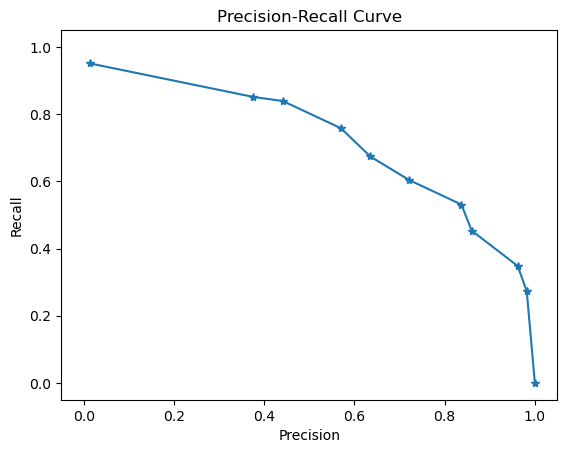

In [27]:
f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()
plot_data('data_file.csv')

## Unit Test

- **setUp Method**: Explains the creation of a temporary CSV file with predefined data for testing the **`plot_data`** function.
- **test_plot_data_from_csv Method**: Describes the aim to test the data handling logic of **`plot_data`**, acknowledging the limitation that graphical output cannot be verified through this test.
- **tearDown Method**: Clarifies the cleanup process by deleting the temporary CSV file used for testing to maintain a clean environment.
- **Running the Test in Jupyter**: Offers guidance on how to execute the unit test within a Jupyter Notebook environment.

In [32]:
class TestPlotData(unittest.TestCase):
    """
    Defines a unit test case for the plot_data function to ensure it correctly processes
    data from a CSV file and plots the precision-recall curve.
    """
    
    def setUp(self):
        """
        Prepares the testing environment before each test method is executed.
        This involves creating a temporary CSV file with test data.
        """
        # Sample CSV file path
        self.csv_file_path = "temp_test_data.csv"
        # Test data to be written to the CSV file
        self.test_data = [
            ["precision", "recall"],  # Header row
            ["0.1", "0.9"],
            ["0.4", "0.85"],
            ["0.9", "0.2"]
        ]
        
        # Write the test data to a CSV file
        with open(self.csv_file_path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(self.test_data)
    
    def test_plot_data_from_csv(self):
        """
        Tests the plot_data function's ability to read and process data from a CSV file.
        
        Note: This test verifies data handling aspects of the plot_data function. Direct
        verification of the plotted output is not within the scope of this unit test.
        """
        # Attempt to run the plot_data function with the temporary CSV file
        try:
            plot_data(self.csv_file_path)
        except Exception as e:
            self.fail(f"plot_data function raised an exception: {e}")
    
    def tearDown(self):
        """
        Cleans up the testing environment after each test method is executed by removing
        the temporary CSV file.
        """
        # Remove the temporary CSV file if it exists
        if os.path.exists(self.csv_file_path):
            os.remove(self.csv_file_path)


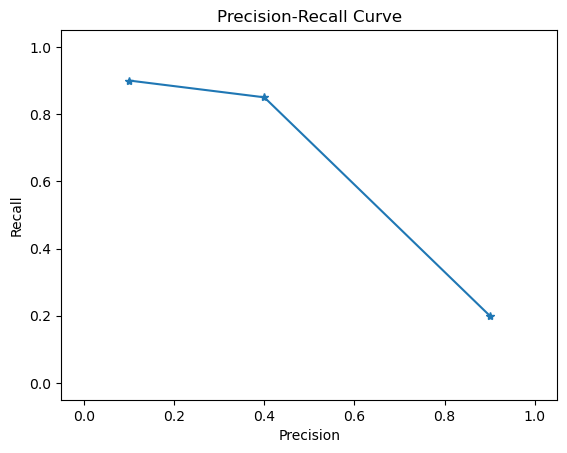

.
----------------------------------------------------------------------
Ran 1 test in 0.195s

OK


In [35]:
# This part ensures the unit test runs only when this script is executed directly
if __name__ == '__main__':
    unittest.main(argv=['', 'TestPlotData'], exit=False)

----------------

<h1 id="exercise-4"><strong>Exercise 4 Solution</strong></h1>


## Problems and Solutions

### Resolving the Batch Size Discrepancy

1. **Problem Overview**: Altering the **`batch_size`** parameter to 64 triggers an error due to a disparity between the expected sizes of inputs and targets during the training phases. This problem usually emerges where the loss is calculated, highlighting an inconsistency in the dimensions expected by the model versus those provided.
    
    **Root Cause**: This discrepancy arises because the discriminator receives a combined set of real and artificially generated samples, doubling the input size it needs to evaluate. The adjustment needed for the size of labels (**`real_samples_labels`** and **`generated_samples_labels`**) to mirror this doubled input size is missing, leading to the observed error.
    
    **Rectification Strategy**: To fix this, it's necessary to dynamically adjust the sizes of the label tensors to match the combined input size when feeding data into the discriminator. This adjustment ensures that the dimensions of inputs and corresponding labels align, facilitating error-free training progression.
    

### Addressing the Cosmetic Issue in Image Visualization

1. **Issue Identification**: The minor or cosmetic issue pertains to how the generated images are displayed during the training process.
    
    **Specific Concern**: In environments like Jupyter Notebooks, where outputs are dynamically displayed within the interface, the expected behavior is for old plots of generated images to be replaced with new ones periodically (such as at the conclusion of each training epoch). However, if not managed properly, this process can clutter the output with outdated images.
    
    **Proposed Solution**: Implementing **`clear_output(wait=True)`** from the IPython.display library can effectively manage this by clearing old images before new ones are plotted. This method ensures that only the most recent set of images is visible, keeping the output streamlined and focused on the current state of image generation by the GAN.

In [4]:
# Remained unchanged

class Generator(nn.Module):
    """
    Generator class for the GAN
    """

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

In [5]:
# Remained unchanged

class Discriminator(nn.Module):
    """
    Discriminator class for the GAN
    """
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [6]:
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):

    # Add/adjust code.

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        # see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # example data
    real_samples, mnist_labels = next(iter(train_loader))

    fig = plt.figure()
    for i in range(16):
        sub = fig.add_subplot(4, 4, 1 + i)
        sub.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
        sub.axis('off')

    fig.tight_layout()
    fig.suptitle("Real images")
    display(fig)

    time.sleep(5)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    
    # train - Loop over the dataset multiple times, each loop is an epoch.
    for epoch in range(num_epochs):
        # Enumerate over the data loader to get batches of real images and labels.
        for n, (real_samples, mnist_labels) in enumerate(train_loader):
            # Dynamic adjustment for the batch size, particularly for the last batch that may be smaller.
            current_batch_size = real_samples.size(0)
    
            # Move the real samples to the specified device (GPU or CPU).
            real_samples = real_samples.to(device=device)
            # Create labels for real samples (1s) with the correct batch size.
            real_samples_labels = torch.ones((current_batch_size, 1), device=device)
            
            # Generate latent space samples (random noise) for the generator.
            latent_space_samples = torch.randn((current_batch_size, 100), device=device)
            # Generate fake images from the latent space samples.
            generated_samples = generator(latent_space_samples)
            # Create labels for generated samples (0s) to match the batch size.
            generated_samples_labels = torch.zeros((current_batch_size, 1), device=device)
    
            # Concatenate the real images with the generated images to form a single batch.
            all_samples = torch.cat((real_samples, generated_samples), dim=0)
            # Similarly, concatenate the labels for real and generated images.
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels), dim=0)
    
            # Zero the gradients of the discriminator before the forward pass.
            discriminator.zero_grad()
            # Forward pass the concatenated images through the discriminator.
            output_discriminator = discriminator(all_samples)
            # Calculate the loss for the discriminator based on its output.
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            # Backpropagate the loss for the discriminator and update its weights.
            loss_discriminator.backward()
            optimizer_discriminator.step()
    
            # Prepare new latent space samples for generating images to train the generator.
            latent_space_samples = torch.randn((current_batch_size, 100), device=device)
    
            # Zero the gradients of the generator before the forward pass.
            generator.zero_grad()
            # Generate new images to be used for training the generator.
            generated_samples = generator(latent_space_samples)
            # Pass the generated images through the discriminator to get the classification.
            output_discriminator_generated = discriminator(generated_samples)
            # Calculate the loss for the generator based on the discriminator's output.
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            # Backpropagate the loss for the generator and update its weights.
            loss_generator.backward()
            optimizer_generator.step()
    
            # Correctly clear and display the generated images
            if n == len(train_loader) - 1:  # Updated condition to check if it's the last batch in the epoch
                name = f"Generate images\n Epoch: {epoch} Loss D.: {loss_discriminator:.2f} Loss G.: {loss_generator:.2f}"
                generated_samples = generated_samples.detach().cpu().numpy()
                fig = plt.figure()
                for i in range(16):
                    sub = fig.add_subplot(4, 4, 1 + i)
                    sub.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
                    sub.axis('off')
                fig.suptitle(name)
                fig.tight_layout()
                clear_output(wait=False)
                display(fig)

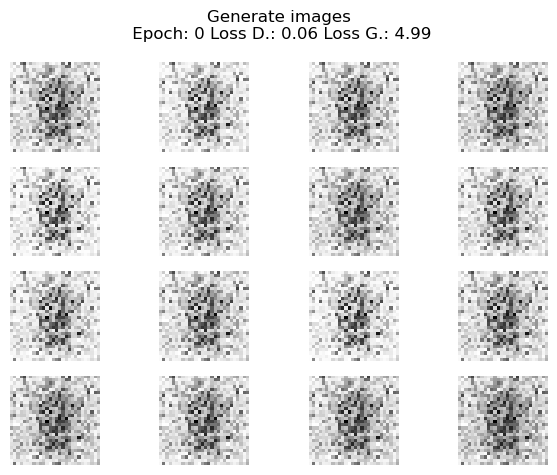

In [ ]:
train_gan(batch_size=64, num_epochs=100)

# Unit Test

A basic approach is to verify that the **`Generator`** produces outputs of the correct shape and that the **`Discriminator`** can accept those outputs and return a valid prediction.

- **Generator Output Shape**: This test verifies that the generator produces outputs with the correct dimensions. Given a batch of random noise vectors, it checks if the generator's output matches the expected shape, which should align with the input dimensions of the discriminator and the expected image size (in this case, MNIST images of 28x28 pixels).
- **Discriminator Output Shape**: This test checks whether the discriminator provides a prediction for each input image in a batch. It ensures that, given a batch of images, the discriminator's output is a tensor with one prediction per image.

In [11]:
class TestGANComponents(unittest.TestCase):
    """
    This test class focuses on verifying the basic functionality
    of the Generator and Discriminator components of the GAN.
    """
    
    def test_generator_output_shape(self):
        """
        Test if the Generator produces output with the expected shape.
        """
        # Initialize a generator instance
        generator = Generator()
        
        # Create a batch of random noise vectors
        random_noise = torch.randn(10, 100)  # Batch size of 10, noise dimension of 100
        
        # Generate images from the noise vectors
        generated_images = generator(random_noise)
        
        # Check if the generated images have the expected shape (batch_size, channels, height, width)
        self.assertEqual(generated_images.size(), (10, 1, 28, 28),
                         "Generated images should have shape [10, 1, 28, 28]")
    
    def test_discriminator_output_shape(self):
        """
        Test if the Discriminator returns a prediction for each image in a batch.
        """
        # Initialize a discriminator instance
        discriminator = Discriminator()
        
        # Create a batch of fake images (assuming the same size as MNIST images)
        fake_images = torch.randn(10, 1, 28, 28)  # Batch size of 10, 1 channel, 28x28 images
        
        # Pass the fake images through the discriminator
        predictions = discriminator(fake_images)
        
        # Check if the discriminator returns a prediction for each image in the batch
        self.assertEqual(predictions.size(), (10, 1),
                         "Discriminator should return a prediction for each image in the batch")
        

In [12]:
# This enables running the tests from the command line
if __name__ == '__main__':
    unittest.main(argv=['', 'TestGANComponents'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.053s

OK
